# Data Storytelling

In [151]:
# data manipulation
import numpy as np
import pandas as pd

# data visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context('notebook')
sns.set_palette('muted')

# statistics
from scipy import stats

In [152]:
reviews_df = pd.read_csv('basenotes_reviews_df_clean.csv')

In [153]:
reviews_df.head()

,rating_value,review_id,user_id,user_name,user_location,scent_id,scent_name,review_text,scent_brand
0,2.0,232695,13378905,Sniffers,United States,26133451.0,Cendres de Thé,On opening I get a cardamom smelling tea with ...,Phaedon
1,1.0,232691,1361,drseid,United States,26158904.0,Salted Green Mango,Salted Green Mango opens with subdued bitter o...,Strangers Parfumerie
2,2.0,232688,26195006,speedracer,United States,26161313.0,Nuit d'Issey Polaris,"Spicy-warm vanilla, green cypress and slightly...",Issey Miyake
3,2.0,232682,13381457,rbaker,United Kingdom,26151148.0,Garden Lilies,"The lily is present form the start, quite nice...",Jo Malone London
4,2.0,232676,28472,rogalal,United States,26135345.0,Santa Subita,"After a shock of mint quickly passes, this mos...",Technique Indiscrete


## 1. Rating Value

In [64]:
rating_value_pcts = reviews_df['rating_value'].value_counts(normalize=True)
print(rating_value_pcts)

3.0    0.638312
2.0    0.226017
1.0    0.135671
Name: rating_value, dtype: float64


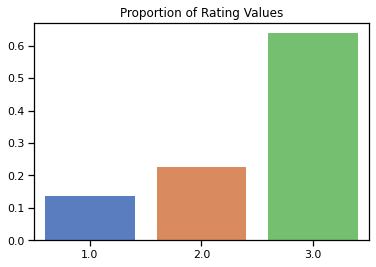

In [135]:
sns.barplot(x=rating_value_pcts.index, y=rating_value_pcts)

plt.title('Proportion of Rating Values')
plt.ylabel('')

plt.show()

In [97]:
reviews_df['rating_value'].describe()

count    157373.000000
mean          2.502640
std           0.722038
min           1.000000
25%           2.000000
50%           3.000000
75%           3.000000
max           3.000000
Name: rating_value, dtype: float64

In [98]:
reviews_df['rating_value'].mean()

2.502640224180768

In [99]:
reviews_df['rating_value'].median()

3.0

## 2. Username

In [165]:
# calculate counts for each username
user_name_counts = reviews_df['user_name'].value_counts()

# view top 10 usernames by proportion
user_name_counts[:10]

rbaker               2814
Darvant              2571
foetidus             2346
SirSlarty            1910
odysseusm            1675
JackTwist            1470
HouseOfPhlegethon    1381
speedracer           1375
Kaizen1972           1334
Colin Maillard       1254
Name: user_name, dtype: int64

The most frequent usernames are each only about 1-2% of reviews so we have a good variety of users.

In [216]:
# exclude users that appear less than 30 times
user_names_30 = user_name_counts[user_name_counts >= 30].index

# calculate median rating for each drug
user_name_median = reviews_df[reviews_df['user_name'].\
                              isin(user_names_30)].\
                              groupby('user_name', axis=0).\
                              agg({'rating_value':'median'})

# sort drugs by rating descending
user_name_median_sorted = user_name_median.sort_values('rating_value', ascending=False)

# display 10 users with highest median rating
print(f'10 users with highest median rating:\n{user_name_median_sorted[:10]}')

# display 10 users with lowest median rating
print(f'\n10 users with lowest median rating:\n{user_name_median_sorted[-10:]}')

10 users with highest median rating:
                 rating_value
user_name                    
20scents                  3.0
framethephrases           3.0
dreese                    3.0
drseid                    3.0
drussell41                3.0
dvdlpznyc                 3.0
dynamicddanny             3.0
eRL00p                    3.0
elgab89                   3.0
elmatador75               3.0

10 users with lowest median rating:
                       rating_value
user_name                          
Myspunge                        2.0
DutchSchwag                     2.0
psebi101                        2.0
gimmegreen                      2.0
duncanw                         1.5
photofinish                     1.0
JohnnyH                         1.0
JennieJenJamz                   1.0
everso                          1.0
Angelo Orazio Pregoni           1.0


## 3. User Location

In [201]:
num_unique_locations = len(reviews_df['user_location'].unique())
print(f"Number of unique locations: {num_unique_locations}")

Number of unique locations: 134


In [200]:
top_10_locations = reviews_df['user_location'].value_counts(normalize=True)[:10]
print(f"Top 10 locations:\n{top_10_locations}")

Top 10 locations:
United States     0.445661
no_location       0.188952
United Kingdom    0.076716
Italy             0.040560
Canada            0.038431
Australia         0.021198
Netherlands       0.015829
Iran              0.012715
England           0.012391
Sweden            0.010250
Name: user_location, dtype: float64


In [77]:
bottom_10_locations = reviews_df['user_location'].value_counts(normalize=True)[-10:]
print(f"Bottom 10 locations:\n{bottom_10_locations}")

Bottom 10 locations:
Mauritius               0.000006
Haiti                   0.000006
Georgia                 0.000006
Monaco                  0.000006
Ethiopia                0.000006
Australia-Aboriginal    0.000006
Congo-Kinshasa          0.000006
Benin                   0.000006
Azores                  0.000006
Angola                  0.000006
Name: user_location, dtype: float64


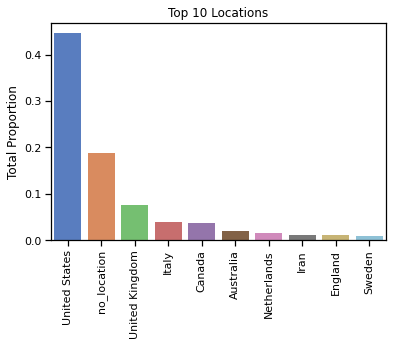

In [146]:
sns.barplot(x=top_10_locations.index, y=top_10_locations)

plt.title('Top 10 Locations')
plt.ylabel('Total Proportion')
plt.xticks(rotation=90)


plt.show()

Nearly half of the reviews are from the United States. The next most frequent location (not counting reviews without a location) is the United Kingdom with only about 7.6% of reviews.

In [215]:
# calculate counts for each username
user_location_counts = reviews_df['user_location'].value_counts()

# exclude users that appear less than 30 times
user_location_30 = user_location_counts[user_location_counts >= 30].index

# calculate median rating for each drug
user_location_median = reviews_df[reviews_df['user_location'].\
                              isin(user_location_30)].\
                              groupby('user_location', axis=0).\
                              agg({'rating_value':'median'})

# sort drugs by rating descending
user_location_median_sorted = user_location_median.sort_values('rating_value', ascending=False)

# display 10 users with highest median rating
print(f'10 countries with highest median rating:\n{user_location_median_sorted[:10]}')

# display 10 users with lowest median rating
print(f'\n10 countries with lowest median rating:\n{user_location_median_sorted[-10:]}')

10 countries with highest median rating:
                    rating_value
user_location                   
Lithuania                    3.0
Poland                       3.0
Scotland                     3.0
Saudi Arabia                 3.0
Russian Federation           3.0
Romania                      3.0
Puerto Rico                  3.0
Portugal                     3.0
Philippine                   3.0
Sikkim                       3.0

10 countries with lowest median rating:
               rating_value
user_location              
Italy                   3.0
Japan                   3.0
Austria                 3.0
Australia               3.0
Bulgaria                3.0
Abu Dhabi               2.5
Cuba                    2.0
Jordan                  2.0
Morocco                 2.0
Kuwait                  2.0


## 4. Scent Name

In [203]:
num_unique_scent_name = len(reviews_df['scent_name'].unique())
print(f"Number of unique scent names: {num_unique_scent_name}")

Number of unique scent names: 17435


In [204]:
top_10_scent_names = reviews_df['scent_name'].value_counts(normalize=True)[:10]
print(f"Top 10 scent naems: {top_10_scent_names}")

Top 10 scent naems: Vetiver                    0.003342
Terre d'Hermès             0.003203
A*Men / Angel Men          0.003101
Black                      0.003012
Green Irish Tweed          0.002739
Kouros                     0.002288
Fahrenheit                 0.002211
Le Mâle                    0.002078
Acqua di Giò pour Homme    0.002072
Aventus                    0.002059
Name: scent_name, dtype: float64


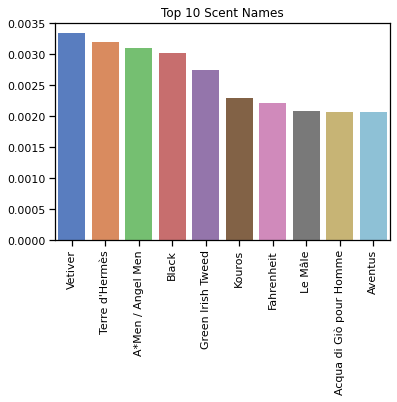

In [205]:
sns.barplot(x=top_10_scent_names.index, y=top_10_scent_names)

plt.title('Top 10 Scent Names')
plt.ylabel('')
plt.xticks(rotation=90)

plt.show()

There are 17,435 different scents and the most frequent each make up less than 1% of the reviews.

In [214]:
# calculate counts for each username
scent_name_counts = reviews_df['scent_name'].value_counts()

# exclude users that appear less than 30 times
scent_name_30 = scent_name_counts[scent_name_counts >= 30].index

# calculate median rating for each drug
scent_name_median = reviews_df[reviews_df['scent_name'].\
                              isin(scent_name_30)].\
                              groupby('scent_name', axis=0).\
                              agg({'rating_value':'median'})

# sort drugs by rating descending
scent_name_median_sorted = scent_name_median.sort_values('rating_value', ascending=False)

# display 10 users with highest median rating
print(f'10 scents with highest median rating:\n{scent_name_median_sorted[:10]}')

# display 10 users with lowest median rating
print(f'\n10 scents with lowest median rating:\n{scent_name_median_sorted[-10:]}')

10 scents with highest median rating:
                                   rating_value
scent_name                                     
"Vintage" Tabaróme                          3.0
Méchant Loup                                3.0
Mitsouko Eau de Parfum                      3.0
Monocle Scent One : Hinoki                  3.0
Monsieur Balmain (new)                      3.0
Monsieur de Givenchy                        3.0
Montana Parfum d'Homme (original)           3.0
Moschino pour Homme                         3.0
Mouchoir de Monsieur                        3.0
Moustache                                   3.0

10 scents with lowest median rating:
                                                 rating_value
scent_name                                                   
Fantasy                                                   2.0
Bang                                                      2.0
Porsche Design Essence                                    2.0
Façonnable Eau de Toilette for Men / F

## 5. Scent Brand

In [104]:
num_unique_scent_brands = len(reviews_df['scent_brand'].unique())
print(f"Number of unique scent brands: {num_unique_scent_brands}")

Number of unique scent brands: 2095


In [107]:
top_10_scent_brands = reviews_df['scent_brand'].value_counts(normalize=True)[:10]
print(f"Top 10 scent brands by proportion of reviews:\n{top_10_scent_brands}")

Top 10 scent brands by proportion of reviews:
Guerlain              0.031079
Creed                 0.028499
Chanel                0.024432
Christian Dior        0.024248
Yves Saint Laurent    0.019584
Hermès                0.017188
Serge Lutens          0.016864
Tom Ford              0.014221
Thierry Mugler        0.014151
Calvin Klein          0.013535
Name: scent_brand, dtype: float64


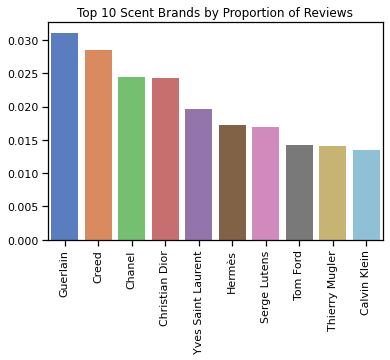

In [108]:
sns.barplot(x=top_10_scent_brands.index, y=top_10_scent_brands)

plt.title('Top 10 Scent Brands by Proportion of Reviews')
plt.ylabel('')
plt.xticks(rotation=90)

plt.show()

In [119]:
reviews_df['scent_name'].value_counts() > 30

Vetiver                             True
Terre d'Hermès                      True
A*Men / Angel Men                   True
Black                               True
Green Irish Tweed                   True
                                   ...  
White Rabbit                       False
Legend pour Femme                  False
Pour Un Homme Millésime 2014       False
Mr. Bubble                         False
Endless Ocean Pacific for Women    False
Name: scent_name, Length: 17435, dtype: bool

In [116]:
sum(reviews_df['scent_name'].value_counts() > 30)

1099